In [119]:
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [121]:
lexicon = pd.read_csv('NRC-Emotion-Lexicon-v0.92-English.csv', header=0)
total = len(lexicon)

In [122]:
lexicon.head()

,English,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,1,0,0,0,1,0,1,0,0
3,abandoned,0,1,1,0,0,1,0,1,0,0
4,abandonment,0,1,1,0,0,1,0,1,1,0


In [123]:
emotions = ['Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']

In [124]:
pos = lexicon[(lexicon.Positive == 1) & (lexicon.Negative == 0)]
neg = lexicon[(lexicon.Negative == 1) & (lexicon.Positive == 0)]
both_0 = lexicon[(lexicon.Positive == 0) & (lexicon.Negative == 0)]
both_1 = lexicon[(lexicon.Positive == 1) & (lexicon.Negative == 1)]

In [125]:
def emotion_dist(df):
    dist = df[emotions].sum()
    return list(dist.index), list(dist.values) 
    
p_l, p_v = emotion_dist(pos)
n_l, n_v = emotion_dist(neg)
b0_l, b0_v = emotion_dist(both_0)
b1_l, b1_v = emotion_dist(both_1)

([<matplotlib.patches.Wedge at 0x2448fb1b048>,
 [Text(1.0363566021603117, 0.3687343124239103, 'Anger'),
  Text(0.3602874834595346, 1.039323303530906, 'Anticipation'),
  Text(-0.44359033196986475, 1.0065920809259654, 'Disgust'),
  Text(-0.9714290699744254, 0.5160674006451321, 'Fear'),
  Text(-0.9629004241041745, -0.5318108434960697, 'Joy'),
  Text(-0.32626705855103233, -1.0504997889121432, 'Sadness'),
  Text(0.34332264367873877, -1.0450500286289848, 'Surprise'),
  Text(0.9954621622581081, -0.46803320770262896, 'Trust')])

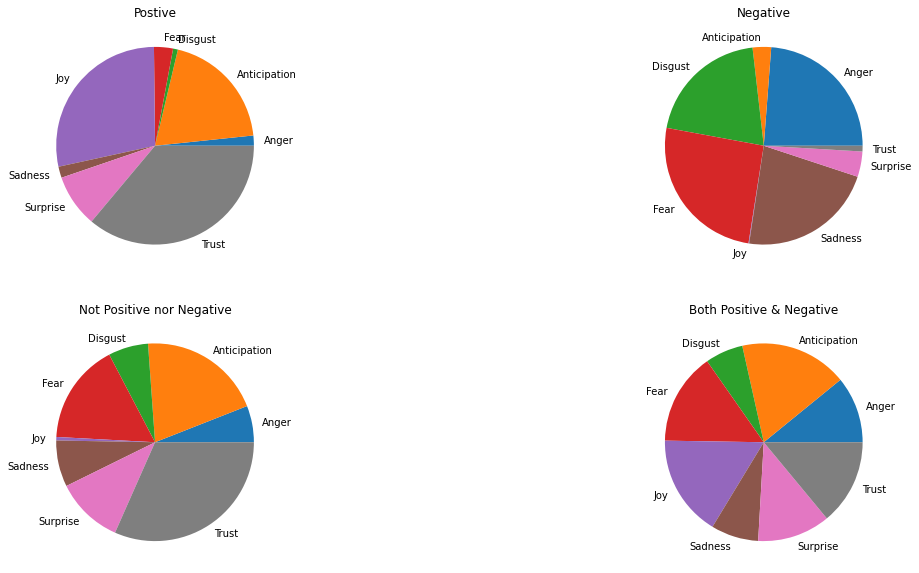

In [126]:
f, (row1, row2) = plt.subplots(2, 2, figsize=(20, 10))

a, b, c, d = row1[0], row1[1], row2[0], row2[1]

a.set_title('Postive')
a.pie(p_v, labels=p_l)

b.set_title('Negative')
b.pie(n_v, labels=n_l)

c.set_title('Not Positive nor Negative')
c.pie(b0_v, labels=b0_l)

d.set_title('Both Positive & Negative')
d.pie(b1_v, labels=b1_l)

In [127]:
pos[pos.Disgust == 1]

,English,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
2876,cove,1,0,0,1,1,1,1,0,0,0
3128,dame,1,0,1,0,1,0,0,0,0,1
4525,excellence,1,0,0,0,1,0,1,0,0,1
4903,finally,1,0,0,1,1,0,1,0,1,1
6044,honest,1,0,1,0,1,1,1,1,0,1
6693,instinctive,1,0,1,0,1,1,0,0,0,0
6759,interested,1,0,0,0,1,0,0,1,0,0
6764,interior,1,0,0,0,1,0,0,0,0,1
8126,morals,1,0,1,1,1,0,1,0,1,1
8499,nurture,1,0,1,1,1,1,1,0,0,1


# Observation
- Each word has reference different emotion according to its context.
- You need to rank the emotions specificly to your current specification to get the best result.